In [1]:
%pylab inline
import re
import pymongo
import pylab
from multiprocessing import Pool
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [2]:
client = pymongo.MongoClient('localhost', 27017)
db = client.get_database('tvtropes')
media_collection = db.get_collection('media')
trope_collection = db.get_collection('tropes')

In [5]:
chars_to_remove = str.maketrans('', '', '{}[]"\':')

In [6]:
def sanitize_links(link_txt):
    result = link_txt.lstrip('<br> * ')
    result = result.replace('spoiler:', '')
    result = result.translate(chars_to_remove)
    result = result.rstrip(':')
    if len(result) == 0:
        return None
    if result[0] == ' ':
        return None
    result = result.split()[0]
    return result

In [4]:
link_pattern1 = re.compile('<br>\* \S+:')
link_pattern2 = re.compile('\[\[[^\]\]]+]]')

In [7]:
def get_tropes_from_source(page_src):
    try:
        page_src = page_src.split('----')[1]
    except IndexError:
        return []
    result = link_pattern1.findall(page_src) + link_pattern2.findall(page_src)
    result = [sanitize_links(i) for i in result]
    result = [i for i in result if i is not None]
    return result

In [9]:
def get_tropes_from_document(document):
    result = get_tropes_from_source(document['source'])
    if 'subpage_sources' in document:
        for i in document['subpage_sources']:
            result.extend(get_tropes_from_source(i))
    return list(set(result))

In [10]:
def add_tropes_to_media(media_doc):
    current_tropes = get_tropes_from_document(media_doc)
    current_trope_ids = [trope_collection.find_one({'name': i}) for i in current_tropes]
    current_trope_ids = [i['_id'] for i in current_trope_ids if i is not None]
    media_collection.find_one_and_update({'_id':media_doc['_id']}, {"$set": {'tropes': current_tropes}})
    media_collection.find_one_and_update({'_id':media_doc['_id']}, {"$set": {'trope_ids': current_trope_ids}})

In [12]:
pool = Pool(processes=7)
pool.map(add_tropes_to_media, media_collection.find({'$and': [{'source': {'$exists': True}}, {'redirect': {'$exists': False}}]}))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [14]:
all_trope_list = []
for media in media_collection.find({'tropes': {'$exists': True}}):
    all_trope_list += media['tropes']
all_trope_list = list(set(all_trope_list))

In [15]:
len(all_trope_list)

197295

In [17]:
good_tropes = [i['name'] for i in trope_collection.find()]

In [18]:
bad_tropes = [i for i in all_trope_list if i not in good_tropes]

In [19]:
len(bad_tropes)

181842

In [20]:
bad_tropes[:10]

['ConkersBadFurDay',
 'http//www.giantitp.com/comics/oots0501.html',
 'http//amymebberson.tumblr.com/post/82423416231/pocket-princesses-100-kegs-will-be-tapped',
 'OlderThanTheNES',
 'LoonyFan=/=StalkerWithACrush',
 'http//www.sgvy.com/store.html',
 'http//brawlinthefamily.keenspot.com/2011/01/10/301-new-year-new-adventures/',
 'Alari’s',
 'Isyllt',
 'http//www.thefrumps.com/comic/2013/10/07/anytime-i-want']

In [21]:
bad_tropes = [i for i in bad_tropes if not i.startswith('http://')]
len(bad_tropes)

181842

In [23]:
bad_tropes = [i for i in bad_tropes if '/' not in i]
len(bad_tropes)

75057

In [25]:
bad_tropes[:100]

['ConkersBadFurDay',
 'OlderThanTheNES',
 'Alari’s',
 'Isyllt',
 'Ivlis',
 'harp',
 '&quot;JohnTravolta',
 'Lets',
 'Debra',
 '&quot;Zack?&quot;',
 'Feldrance',
 '(the',
 'Lindy',
 'guess',
 'TPrings',
 'strikeMagicalGirlLyricalNanoha',
 'Akihisa',
 'GlobalAirship',
 'NervousHabit',
 'Kadokawa',
 'Battler,',
 'strikeGerman',
 'Hariti',
 'assumes',
 'Glorias',
 'Filbert',
 'Yaxley.',
 'Jacknife',
 'HD-AB',
 'JustAStupidAccent',
 'Morgan',
 'Cemented',
 'strikeSuicide',
 'ArbitraryMissionRestriction',
 'Emelious',
 'Keyes',
 'Ripard',
 'AssociationFootball',
 'WomanofaThousandVoices',
 'Titanias',
 'Langon',
 'confessed',
 'Ls',
 'two-thousand',
 'Ascher',
 'hottip*Granted,',
 'Bonforte',
 'Sird',
 'Connor,',
 'MightAsWellNotBeInPrisonAtAll',
 'Jeff,',
 'nosebleed',
 'social',
 'BadassBoast<br>--&gt;Nell',
 'another',
 'JustAsPlanned',
 'ButYouScrewOneGoat',
 '&quot;FUCK&quot;',
 'caption-width-right292Alternate',
 'PufferFish',
 'Sorcha,',
 ',DeadPersonImpersonation',
 'Iris',
 'RedScar

In [27]:
len_diffs = [len(i['tropes']) - len(i['trope_ids']) for i in media_collection.find({'tropes': {'$exists': True}})]

(array([  2.59660000e+04,   6.98000000e+03,   2.99600000e+03,
          1.65400000e+03,   1.07400000e+03,   7.03000000e+02,
          4.47000000e+02,   3.22000000e+02,   2.43000000e+02,
          1.69000000e+02,   1.53000000e+02,   1.10000000e+02,
          9.40000000e+01,   7.60000000e+01,   5.60000000e+01,
          4.00000000e+01,   5.40000000e+01,   2.20000000e+01,
          2.20000000e+01,   2.40000000e+01,   2.10000000e+01,
          1.30000000e+01,   7.00000000e+00,   6.00000000e+00,
          7.00000000e+00,   4.00000000e+00,   1.00000000e+01,
          4.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          3.00000000e+00,   6.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

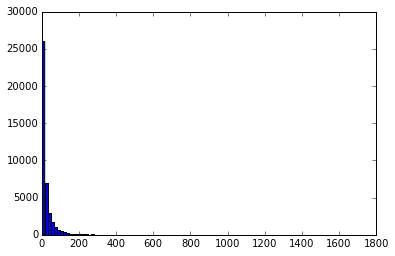

In [30]:
pylab.hist(len_diffs, bins=100)

(array([  1.07390000e+04,   4.39800000e+03,   3.81500000e+03,
          3.13900000e+03,   2.50200000e+03,   1.98400000e+03,
          1.69700000e+03,   1.44800000e+03,   1.13200000e+03,
          9.85000000e+02,   8.51000000e+02,   7.32000000e+02,
          6.33000000e+02,   5.45000000e+02,   4.96000000e+02,
          4.34000000e+02,   4.12000000e+02,   3.54000000e+02,
          3.18000000e+02,   3.32000000e+02,   3.08000000e+02,
          2.53000000e+02,   2.28000000e+02,   2.05000000e+02,
          2.05000000e+02,   1.87000000e+02,   1.69000000e+02,
          1.69000000e+02,   1.54000000e+02,   1.32000000e+02,
          1.35000000e+02,   1.04000000e+02,   1.20000000e+02,
          9.10000000e+01,   1.08000000e+02,   8.80000000e+01,
          7.70000000e+01,   7.30000000e+01,   6.80000000e+01,
          6.20000000e+01,   6.70000000e+01,   6.10000000e+01,
          5.30000000e+01,   4.20000000e+01,   4.90000000e+01,
          4.70000000e+01,   4.40000000e+01,   3.40000000e+01,
        

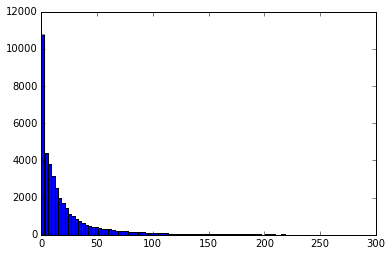

In [32]:
pylab.hist([i for i in len_diffs if i<300], bins=100)

In [35]:
print(len([i for i in len_diffs if i==0]))
print(len([i for i in len_diffs if i<=10]))
print(len([i for i in len_diffs if i>10]))
print(len([i for i in len_diffs if i>50]))
print(len([i for i in len_diffs if i==100]))
print(len([i for i in len_diffs if i==200]))

7661
21099
20228
5385
30
8
